## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('./datasets/bank-additional-full.csv', delimiter=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
dataset.shape

(41188, 21)

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [7]:
dataset["y"] = dataset["y"].map({"yes": 1, "no": 0})
bank_target = dataset["y"]
bank_target 

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [8]:
bank_client = dataset[["age", "job", "marital", "education", "default", "housing", "loan"]]
bank_client

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [9]:
unique_values = {col: bank_client[col].unique() for col in bank_client.columns}
unique_values

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89]),
 'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object)}

**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [10]:
print(dataset["age"].min())
print(dataset["age"].max())
print(dataset["age"].isna().sum())


17
98
0


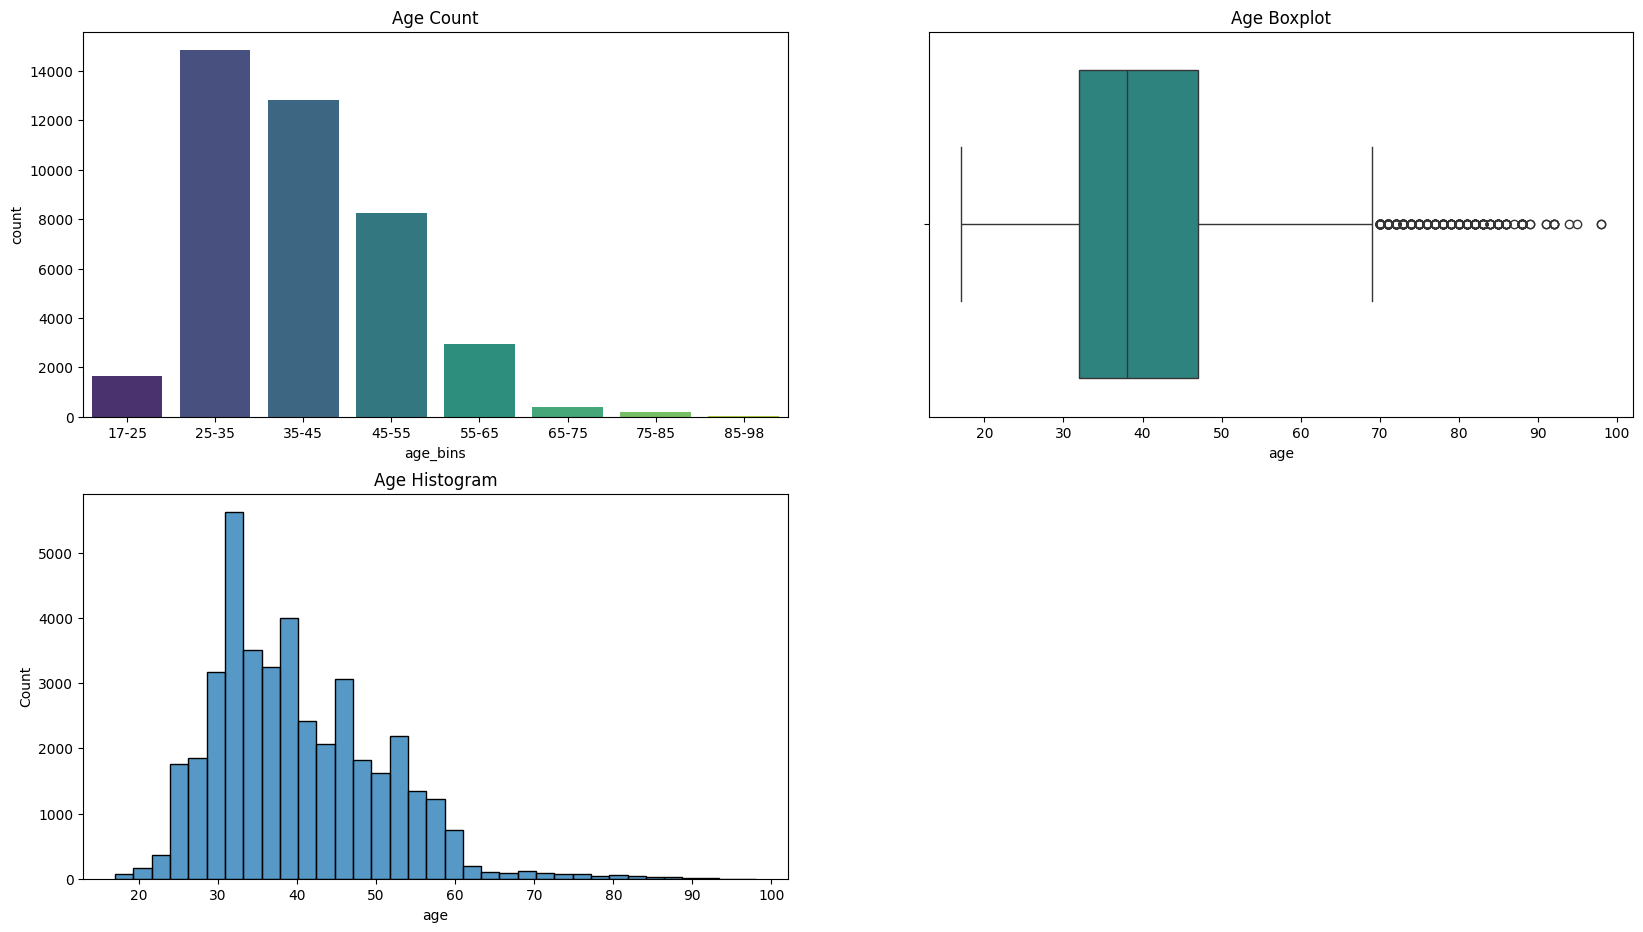

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 11))

dataset['age_bins'] = pd.cut(dataset['age'], bins=[17, 25, 35, 45, 55, 65, 75, 85, 98], 
                             labels=['17-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-98'])

sns.countplot(x='age_bins', data=dataset, palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Age Count')

sns.boxplot(x='age', data=dataset, palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Age Boxplot')

sns.histplot(x='age', data=dataset, bins=35, palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Age Histogram')

ax[1, 1].axis('off') 

plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   найбільша кількість користувачів банку в районі 30 років
2.   від 70 до 100 багато аномалій, бо немає користувачів. тобто аномально низькі значення
3.   наша вибірка 17-98


**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [12]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """
    
    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [13]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

Q1 = 28 років. 10% людей у вибірці мають вік менше або дорівнює 28 років
Q3 = 55 років. 90% людей у вибірці мають вік менше або дорівнює 55 років
Інтерквартильний розмах (IQR) = 27 років , це різниця між Q3 і Q1

Нижня межа: -12.5 років - некоректно, оскільки вік не може бути від’ємним. Всі значення менші за 17 автоматично не враховуються
Верхня межа: 95.5 років. Максимальний вік у датасеті - 98 років, значення вище цієї межі вважаються викидами

Лише вік понад 95.5 років вважається викидом. У нашому випадку це значення 98
% викидів у датасеті є дуже малим, тому їх можна або залишити, або видалити для більшої точності

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

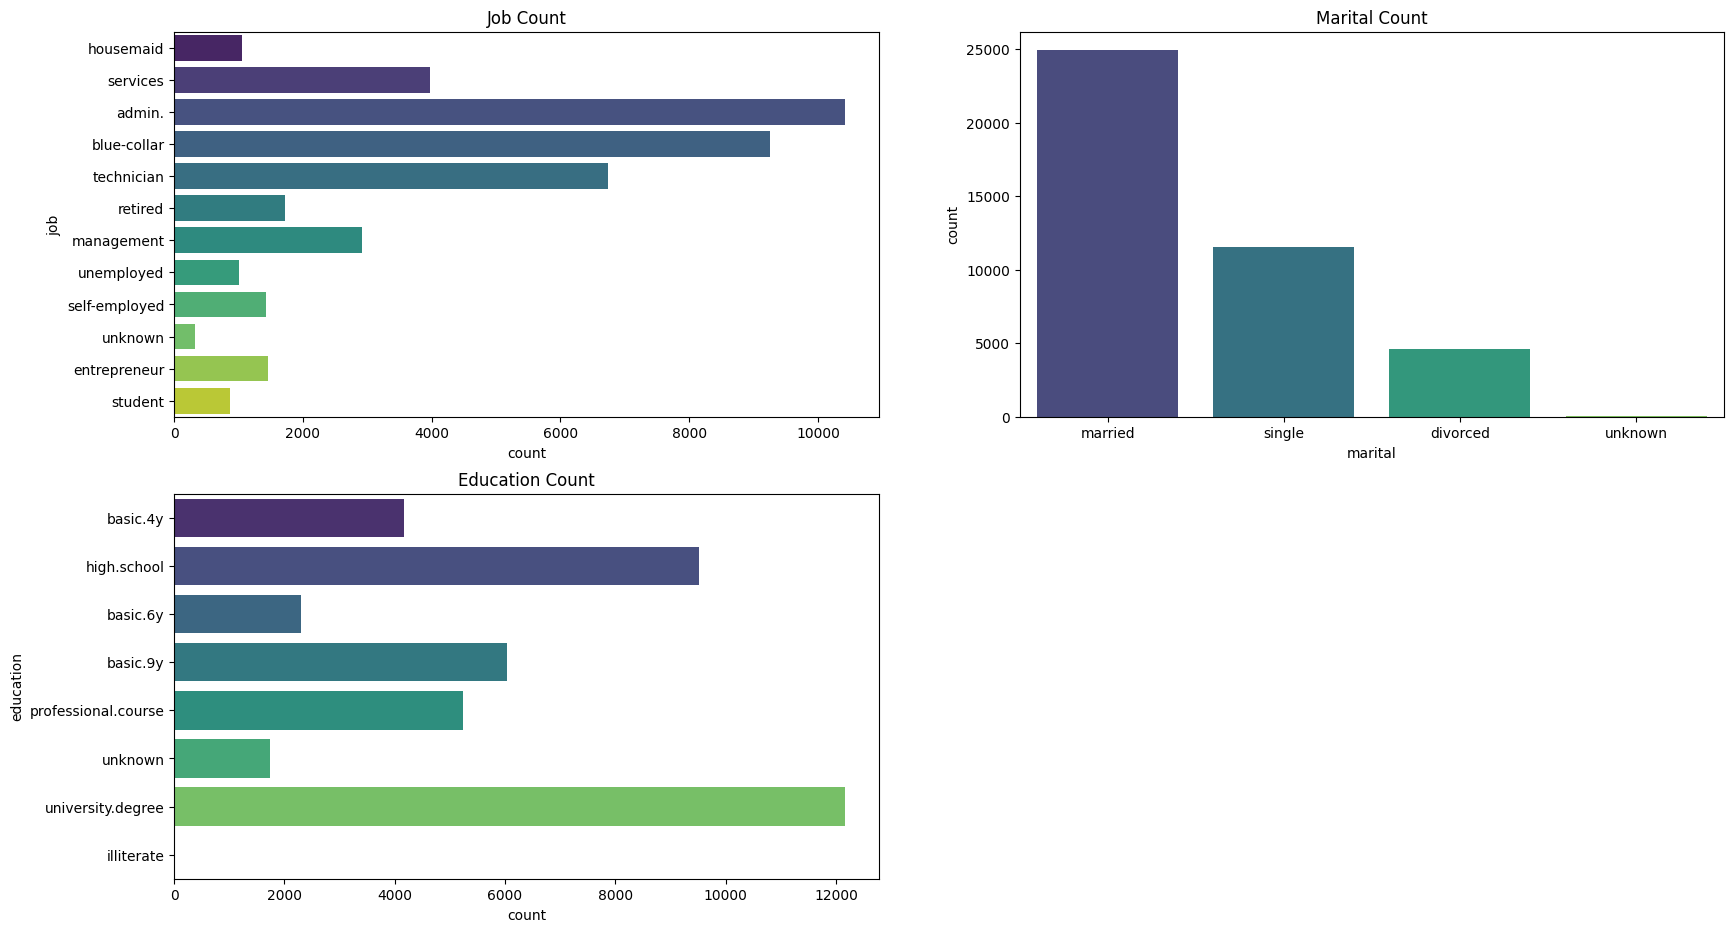

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20, 11))

sns.countplot(y='job', data=bank_client, palette='viridis', ax=ax[0, 0],)
ax[0, 0].set_title('Job Count')

sns.countplot(x='marital', data=bank_client, palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Marital Count')

sns.countplot(y='education', data=bank_client, palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Education Count')

ax[1, 1].axis('off') 

plt.show()

**Висновки з завдання 6 (детальні)**

1.   найбільше працюють адмінами та синіми комірцями
2.   найменше студентів, непрацюючих і тих кого ми не знаємо
3.   12к мають університетську освіту
4.   більшість людей одружені

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

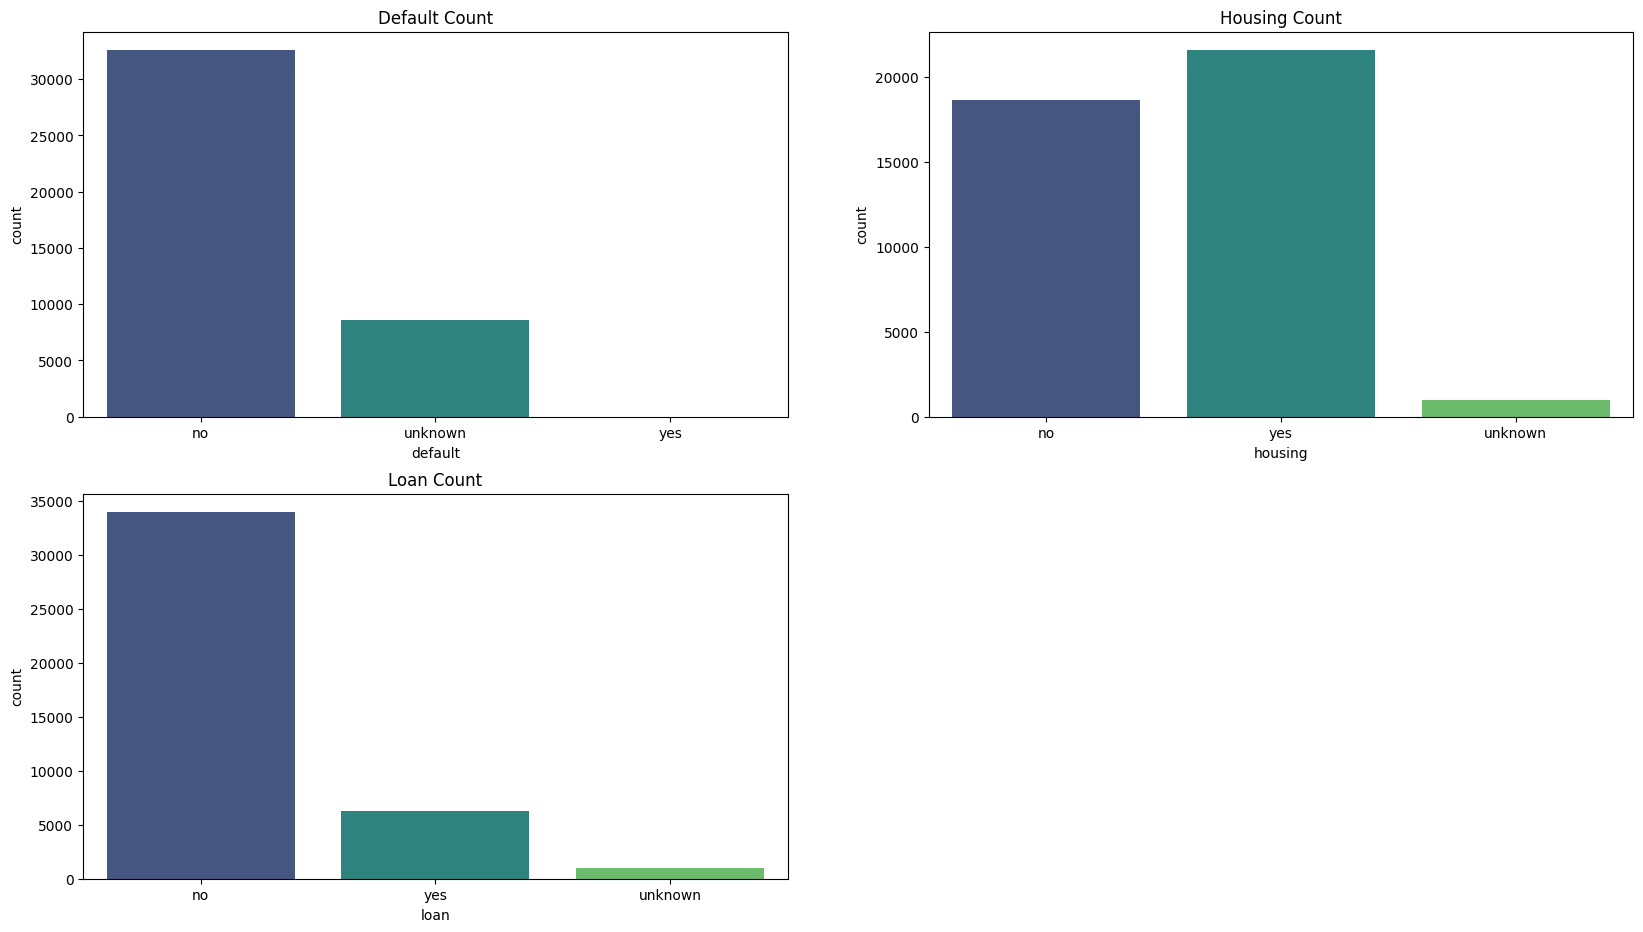

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 11))

sns.countplot(x='default', data=bank_client, palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Default Count')

sns.countplot(x='housing', data=bank_client, palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Housing Count')

sns.countplot(x='loan', data=bank_client, palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Loan Count')

ax[1, 1].axis('off')

plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [16]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
      
    return df

In [17]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [18]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartiles
    
    dataframe: pd.DataFrame to encode
    age_col: column name containing age data
    
    Returns:
    dataframe with encoded age column
    """
    dataframe[age_col] = pd.qcut(dataframe[age_col], q=4, labels=[0, 1, 2, 3])
    return dataframe

In [19]:
df_bank_client = encode_age(bank_client, 'age')
df_bank_client

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,3,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [20]:
bank_relat = ["contact", "month", "day_of_week", "duration"]
df_bank_relat = dataset[bank_relat]
df_bank_relat

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442


In [21]:
df_bank_relat.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [22]:
contact_unique_values = dataset["contact"].unique()
month_unique_values = dataset["month"].unique()
day_of_week_unique_values = dataset["day_of_week"].unique()

print(contact_unique_values, month_unique_values, day_of_week_unique_values)

['telephone' 'cellular'] ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



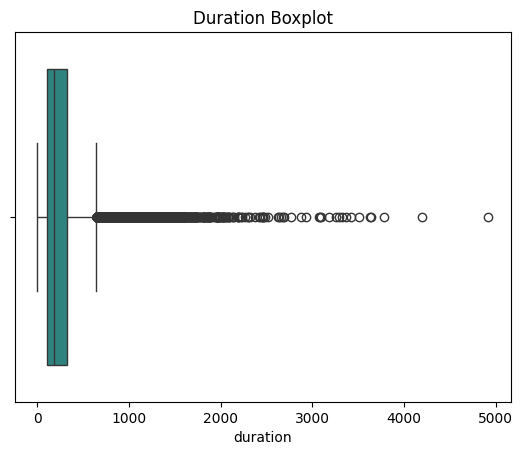

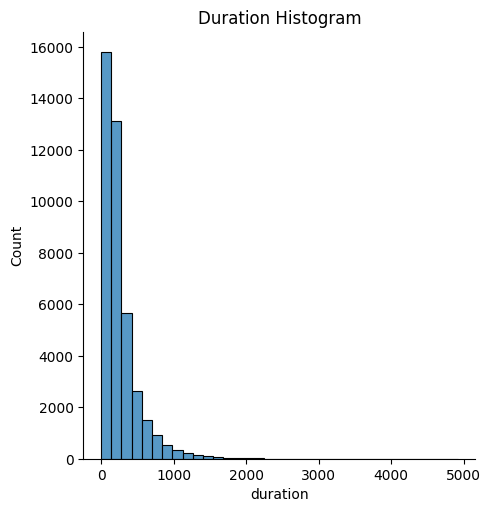

In [23]:
sns.boxplot(x='duration', data=df_bank_relat, palette='viridis')
plt.title('Duration Boxplot')

sns.displot(x='duration', data=df_bank_relat, bins=35, palette='viridis')
plt.title('Duration Histogram')

plt.show()

In [24]:
skewness = df_bank_relat['duration'].skew()
kurtosis = df_bank_relat['duration'].kurtosis()

print(f"Skewness: {skewness:.2f}")  
print(f"Kurtosis: {kurtosis:.2f}")

# Skewness > 1 або < -1   сильна асиметрія (важкі хвости)
# Kurtosis > 3            дуже гострий розподіл (багато викидів)
# Kurtosis < 3            плоский розподіл (менше викидів)

Skewness: 3.26
Kurtosis: 20.25


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [25]:
bank_relat = encode_categorical_columns(df_bank_relat, ['contact', 'month', 'day_of_week'])
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
41183,0,7,0,334
41184,0,7,0,383
41185,0,7,0,189
41186,0,7,0,442


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [26]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column into quartiles
    
    dataframe: pd.DataFrame to encode
    duration_col: Name of the duration column to encode
    
    returns: DataFrame with encoded duration values
    """
    
    if dataframe[duration_col].isnull().sum() > 0:
        print("Warning: NaN values detected in", duration_col)
        dataframe = dataframe.dropna(subset=[duration_col]) 

    
    dataframe[duration_col + '_quartile'] = pd.qcut(
        dataframe[duration_col], 
        q=4, 
        labels=[0, 1, 2, 3], 
        duplicates='drop'
    )
    
    return dataframe

In [27]:
bank_relat = encode_duration(bank_relat, 'duration')

print(bank_relat[['duration', 'duration_quartile']].head())

   duration duration_quartile
0       261                 2
1       149                 1
2       226                 2
3       151                 1
4       307                 2


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [28]:
bank_socec = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]
df_bank_socec = dataset[bank_socec]
df_bank_socec

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,0
1,1.1,93.994,-36.4,4.857,5191.0,0
2,1.1,93.994,-36.4,4.857,5191.0,0
3,1.1,93.994,-36.4,4.857,5191.0,0
4,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6,1
41184,-1.1,94.767,-50.8,1.028,4963.6,0
41185,-1.1,94.767,-50.8,1.028,4963.6,0
41186,-1.1,94.767,-50.8,1.028,4963.6,1


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [29]:
bank_other = ["campaign", "pdays", "previous", "poutcome"]
df_bank_other = dataset[bank_other]
df_bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [30]:
dataset["poutcome"].unique()
def encode_poutcome(df):
    
    df['poutcome'] = df['poutcome'].map({'nonexistent': 1, 'failure': 0, 'success': 2})
    return df

df_bank_other = encode_poutcome(df_bank_other)

print(df_bank_other.tail(10))

       campaign  pdays  previous  poutcome
41178         2      6         3         2
41179         3    999         0         1
41180         2    999         0         1
41181         1    999         0         1
41182         1      9         1         2
41183         1    999         0         1
41184         1    999         0         1
41185         2    999         0         1
41186         1    999         0         1
41187         3    999         1         0


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [31]:
bank_final = pd.concat([df_bank_client, df_bank_relat, df_bank_socec, df_bank_other], axis=1)
bank_final = bank_final.drop(columns=["pdays"])
bank_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,duration_quartile,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,...,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1
1,3,7,1,3,1,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1
2,1,7,1,3,0,2,0,1,6,1,...,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1
3,2,0,1,1,0,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1
4,3,7,1,3,0,0,2,1,6,1,...,2,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,5,1,5,0,2,0,0,7,0,...,3,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,1
41184,2,1,1,5,0,0,0,0,7,0,...,3,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,1
41185,3,5,1,6,0,2,0,0,7,0,...,2,-1.1,94.767,-50.8,1.028,4963.6,0,2,0,1
41186,2,9,1,5,0,0,0,0,7,0,...,3,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,1


**Завдання 19** Провести ділення вибірки

In [32]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, stratify=target)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [33]:
target = "y"

In [34]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final.drop(columns=[target]), 
                                                                     bank_final[target], 
                                                                     test_size=0.2, 
                                                                     n_splits=10, 
                                                                     random_state=101)

In [35]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [36]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) 

logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2) * 100)

LOGCV = cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print(f"Logistic Regression CV Accuracy: {LOGCV}")

[[7107  203]
 [ 536  392]]
91.0
Logistic Regression CV Accuracy: 0.9094992412746585


## k-NN

k=1 88.30 (+/- 0.60)
k=2 89.61 (+/- 0.45)
k=3 89.78 (+/- 0.38)
k=4 90.23 (+/- 0.36)
k=5 90.30 (+/- 0.39)
k=6 90.39 (+/- 0.28)
k=7 90.55 (+/- 0.35)
k=8 90.58 (+/- 0.28)
k=9 90.65 (+/- 0.40)
k=10 90.62 (+/- 0.40)
k=11 90.75 (+/- 0.43)
k=12 90.66 (+/- 0.41)
k=13 90.78 (+/- 0.42)
k=14 90.64 (+/- 0.39)
k=15 90.64 (+/- 0.45)
k=16 90.53 (+/- 0.33)
k=17 90.60 (+/- 0.48)
k=18 90.55 (+/- 0.45)
k=19 90.63 (+/- 0.47)
k=20 90.53 (+/- 0.46)
k=21 90.61 (+/- 0.51)
k=22 90.59 (+/- 0.50)
k=23 90.72 (+/- 0.51)
k=24 90.66 (+/- 0.55)
k=25 90.70 (+/- 0.47)
The optimal number of neighbors is 12 with 90.8%


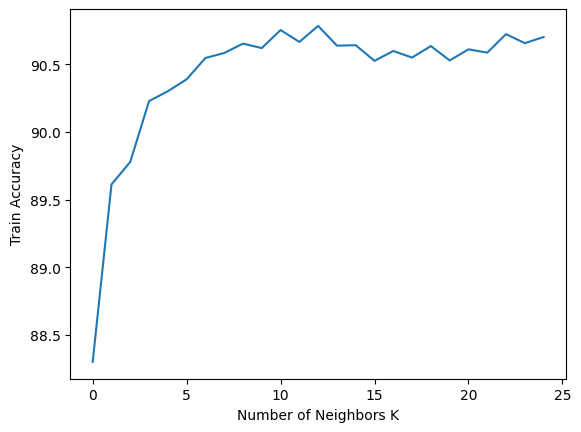

In [38]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7156  154]
 [ 601  327]]
91.0


## Логістична Регресія

In [40]:
models = pd.DataFrame({
                'Models': ["Logistic Regression", "K-Nearest Neighbors"],
                'Score':  [LOGCV, KNNCV]
            })

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Logistic Regression,0.909499
1,K-Nearest Neighbors,0.904709


**Висновки по моделям (детальні)**

1.   Логістична регресія показала точність 90.99%
     K-Nearest Neighbors (KNN) показав трохи нижчу точність 90.55%
     логістична регресія є кращою моделлю за цим критерієм

2.   7109 правильних передбачень "ні"
     398 правильних передбачень "так"
     530 помилкових передбачень (пропущені позитивні випадки)
     201 помилкових передбачень (хибнопозитивні)

3.   KNN робить більше помилок у передбаченні позитивних випадків (618 vs 530 у логістичної регресії).
     Але KNN має менше хибнопозитивних передбачень (160 vs 201 у логістичної регресії).

4.   Оптимальна кількість сусідів: 10 (дає точність 90.8%).
     Але при k=11 точність досягає 90.76%, тобто стабільність результатів після 10 сусідів.

5.   Логістична регресія працює краще, ніж KNN, для цієї задачі.
     Логістична модель має кращу загальну продуктивність і менше помилок у передбаченні.
     KNN можна використовувати як альтернативу, але він має трохи нижчу точність.